In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
batch_n = 100
input_feature = 3
output_feature = 1
epoch_n = 100
learning_rate = 0.01

In [3]:
# input
x = torch.rand(batch_n, input_feature) # row: 100, col: 3
c = torch.Tensor([[3.],[5.],[1.]])
# output label
y = x.mm(c)
y = y.add(torch.rand(batch_n, output_feature)) # not required 

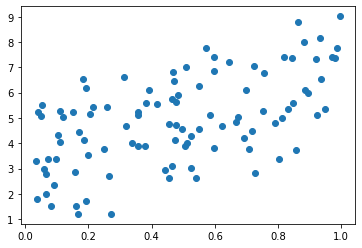

In [4]:
plt.figure()
plt.scatter(x[:, 0], y)
plt.show()

In [5]:
# weight
w = torch.rand(input_feature, output_feature)
w

tensor([[0.7186],
        [0.1061],
        [0.3317]])

In [6]:
# 土法煉鋼
for epoch in range(epoch_n):
    y_predict = x.mm(w)
    # define loss function
    loss = (y_predict - y).pow(2).mean()
    print('epoch:{} , loss: {:.4f}'.format(epoch, loss))
    
    # gredient 
    grad_y_pridict = 2 * ( y_predict - y )
    grad_w = x.t().mm(grad_y_pridict) # w gradient
    
    # update weight
    w -= grad_w * learning_rate

epoch:0 , loss: 21.5239
epoch:1 , loss: 9.0549
epoch:2 , loss: 3.9199
epoch:3 , loss: 1.7859
epoch:4 , loss: 0.8854
epoch:5 , loss: 0.4955
epoch:6 , loss: 0.3199
epoch:7 , loss: 0.2360
epoch:8 , loss: 0.1929
epoch:9 , loss: 0.1687
epoch:10 , loss: 0.1541
epoch:11 , loss: 0.1445
epoch:12 , loss: 0.1381
epoch:13 , loss: 0.1335
epoch:14 , loss: 0.1302
epoch:15 , loss: 0.1279
epoch:16 , loss: 0.1261
epoch:17 , loss: 0.1249
epoch:18 , loss: 0.1239
epoch:19 , loss: 0.1232
epoch:20 , loss: 0.1227
epoch:21 , loss: 0.1223
epoch:22 , loss: 0.1220
epoch:23 , loss: 0.1218
epoch:24 , loss: 0.1217
epoch:25 , loss: 0.1216
epoch:26 , loss: 0.1215
epoch:27 , loss: 0.1214
epoch:28 , loss: 0.1214
epoch:29 , loss: 0.1213
epoch:30 , loss: 0.1213
epoch:31 , loss: 0.1213
epoch:32 , loss: 0.1213
epoch:33 , loss: 0.1212
epoch:34 , loss: 0.1212
epoch:35 , loss: 0.1212
epoch:36 , loss: 0.1212
epoch:37 , loss: 0.1212
epoch:38 , loss: 0.1212
epoch:39 , loss: 0.1212
epoch:40 , loss: 0.1212
epoch:41 , loss: 0.1212
e

In [7]:
w # weight close to c

tensor([[3.3129],
        [5.3394],
        [1.2536]])

## AutoGrad

In [8]:
w = torch.rand(input_feature, output_feature)

Vx = Variable(x, requires_grad = False)
Vy = Variable(y, requires_grad = False)
Vw = Variable(w, requires_grad = True)

for epoch in range(epoch_n):
    y_predict = Vx.mm(Vw)
    # define loss function
    loss = (y_predict - y).pow(2).mean()
    
    # backward
    loss.backward() 
    print('epoch:{} , loss: {:.4f}'.format(epoch, loss))

    Vw.data -= learning_rate * Vw.grad.data
    Vw.grad.data.zero_()

epoch:0 , loss: 22.2578
epoch:1 , loss: 21.5607
epoch:2 , loss: 20.8861
epoch:3 , loss: 20.2333
epoch:4 , loss: 19.6017
epoch:5 , loss: 18.9906
epoch:6 , loss: 18.3992
epoch:7 , loss: 17.8270
epoch:8 , loss: 17.2733
epoch:9 , loss: 16.7375
epoch:10 , loss: 16.2191
epoch:11 , loss: 15.7174
epoch:12 , loss: 15.2320
epoch:13 , loss: 14.7623
epoch:14 , loss: 14.3077
epoch:15 , loss: 13.8679
epoch:16 , loss: 13.4423
epoch:17 , loss: 13.0304
epoch:18 , loss: 12.6319
epoch:19 , loss: 12.2462
epoch:20 , loss: 11.8730
epoch:21 , loss: 11.5119
epoch:22 , loss: 11.1624
epoch:23 , loss: 10.8243
epoch:24 , loss: 10.4970
epoch:25 , loss: 10.1803
epoch:26 , loss: 9.8739
epoch:27 , loss: 9.5773
epoch:28 , loss: 9.2903
epoch:29 , loss: 9.0125
epoch:30 , loss: 8.7438
epoch:31 , loss: 8.4836
epoch:32 , loss: 8.2319
epoch:33 , loss: 7.9883
epoch:34 , loss: 7.7526
epoch:35 , loss: 7.5244
epoch:36 , loss: 7.3036
epoch:37 , loss: 7.0899
epoch:38 , loss: 6.8831
epoch:39 , loss: 6.6829
epoch:40 , loss: 6.4892


In [9]:
Vw

tensor([[2.6359],
        [2.9309],
        [2.5877]], requires_grad=True)

## NN Module

### 01 nn.Module

In [10]:
import torch.nn as nn

class Regression(nn.Module):
    ''' super nn module '''
    def __init__(self):
        super(Regression, self).__init__()

    def forward(self, x, w):
        y_predict = x.mm(w)
        return y_predict

    def backward(self):
        pass

In [11]:
model = Regression()
w = torch.rand(input_feature, output_feature)
Vw = Variable(w, requires_grad = True)

In [12]:
for epoch in range(epoch_n):
    # nn model
    y_predict = model(Vx, Vw)
    
    # define loss function
    loss = (y_predict - y).pow(2).mean()
    # backward
    loss.backward() 
    
    print('epoch:{} , loss: {:.4f}'.format(epoch, loss))

    Vw.data -= learning_rate * Vw.grad.data
    Vw.grad.data.zero_()

epoch:0 , loss: 18.2551
epoch:1 , loss: 17.6896
epoch:2 , loss: 17.1424
epoch:3 , loss: 16.6129
epoch:4 , loss: 16.1005
epoch:5 , loss: 15.6047
epoch:6 , loss: 15.1249
epoch:7 , loss: 14.6606
epoch:8 , loss: 14.2114
epoch:9 , loss: 13.7767
epoch:10 , loss: 13.3560
epoch:11 , loss: 12.9489
epoch:12 , loss: 12.5550
epoch:13 , loss: 12.1738
epoch:14 , loss: 11.8049
epoch:15 , loss: 11.4479
epoch:16 , loss: 11.1025
epoch:17 , loss: 10.7682
epoch:18 , loss: 10.4446
epoch:19 , loss: 10.1316
epoch:20 , loss: 9.8286
epoch:21 , loss: 9.5354
epoch:22 , loss: 9.2517
epoch:23 , loss: 8.9771
epoch:24 , loss: 8.7113
epoch:25 , loss: 8.4542
epoch:26 , loss: 8.2053
epoch:27 , loss: 7.9644
epoch:28 , loss: 7.7313
epoch:29 , loss: 7.5057
epoch:30 , loss: 7.2873
epoch:31 , loss: 7.0760
epoch:32 , loss: 6.8715
epoch:33 , loss: 6.6735
epoch:34 , loss: 6.4819
epoch:35 , loss: 6.2965
epoch:36 , loss: 6.1170
epoch:37 , loss: 5.9433
epoch:38 , loss: 5.7752
epoch:39 , loss: 5.6125
epoch:40 , loss: 5.4550
epoch:

### 02 Replace forward

In [13]:
class Regression(nn.Module):
    ''' nn.Linear repplace x.mm(x) '''
    def __init__(self, in_features, out_features):
        super(Regression, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_predict = self.linear(x)
        return y_predict

    def backward(self):
        pass

In [14]:
model = Regression(input_feature, output_feature)
loss_fn = nn.MSELoss()
print(model)

Regression(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


In [15]:
for epoch in range(epoch_n):
    
    y_predict = model(Vx)
    
    # nn.MSELoss()
    loss = loss_fn(y_predict, y)
    
    model.zero_grad() 

    loss.backward() 
    print('epoch:{} , loss: {:.4f}'.format(epoch, loss))
    
    for param in model.parameters(): # list
        # get w from Variables
        param.data -= learning_rate * param.grad.data

epoch:0 , loss: 27.7585
epoch:1 , loss: 25.9103
epoch:2 , loss: 24.1909
epoch:3 , loss: 22.5911
epoch:4 , loss: 21.1027
epoch:5 , loss: 19.7178
epoch:6 , loss: 18.4293
epoch:7 , loss: 17.2304
epoch:8 , loss: 16.1149
epoch:9 , loss: 15.0769
epoch:10 , loss: 14.1112
epoch:11 , loss: 13.2125
epoch:12 , loss: 12.3763
epoch:13 , loss: 11.5982
epoch:14 , loss: 10.8741
epoch:15 , loss: 10.2003
epoch:16 , loss: 9.5733
epoch:17 , loss: 8.9898
epoch:18 , loss: 8.4467
epoch:19 , loss: 7.9413
epoch:20 , loss: 7.4710
epoch:21 , loss: 7.0332
epoch:22 , loss: 6.6257
epoch:23 , loss: 6.2465
epoch:24 , loss: 5.8934
epoch:25 , loss: 5.5648
epoch:26 , loss: 5.2589
epoch:27 , loss: 4.9741
epoch:28 , loss: 4.7089
epoch:29 , loss: 4.4620
epoch:30 , loss: 4.2322
epoch:31 , loss: 4.0181
epoch:32 , loss: 3.8188
epoch:33 , loss: 3.6331
epoch:34 , loss: 3.4602
epoch:35 , loss: 3.2992
epoch:36 , loss: 3.1492
epoch:37 , loss: 3.0094
epoch:38 , loss: 2.8792
epoch:39 , loss: 2.7578
epoch:40 , loss: 2.6447
epoch:41 ,

### 03 Replace OPT

In [16]:
import torch.optim as opt
model = Regression(input_feature, output_feature)
loss_fn = nn.MSELoss()
optimizer = opt.SGD(model.parameters(), lr=learning_rate) # 要 update model.parameters

In [17]:
for epoch in range(epoch_n):
    y_predict = model(Vx)
    loss = loss_fn(y_predict, y)

    model.zero_grad() 

    loss.backward() 
    print('epoch:{} , loss: {:.4f}'.format(epoch, loss))

    optimizer.step()

epoch:0 , loss: 27.8291
epoch:1 , loss: 25.9909
epoch:2 , loss: 24.2807
epoch:3 , loss: 22.6895
epoch:4 , loss: 21.2091
epoch:5 , loss: 19.8316
epoch:6 , loss: 18.5499
epoch:7 , loss: 17.3574
epoch:8 , loss: 16.2477
epoch:9 , loss: 15.2153
epoch:10 , loss: 14.2545
epoch:11 , loss: 13.3605
epoch:12 , loss: 12.5286
epoch:13 , loss: 11.7545
epoch:14 , loss: 11.0341
epoch:15 , loss: 10.3638
epoch:16 , loss: 9.7399
epoch:17 , loss: 9.1593
epoch:18 , loss: 8.6189
epoch:19 , loss: 8.1160
epoch:20 , loss: 7.6479
epoch:21 , loss: 7.2122
epoch:22 , loss: 6.8067
epoch:23 , loss: 6.4291
epoch:24 , loss: 6.0777
epoch:25 , loss: 5.7506
epoch:26 , loss: 5.4460
epoch:27 , loss: 5.1625
epoch:28 , loss: 4.8984
epoch:29 , loss: 4.6526
epoch:30 , loss: 4.4236
epoch:31 , loss: 4.2104
epoch:32 , loss: 4.0119
epoch:33 , loss: 3.8269
epoch:34 , loss: 3.6546
epoch:35 , loss: 3.4941
epoch:36 , loss: 3.3446
epoch:37 , loss: 3.2052
epoch:38 , loss: 3.0754
epoch:39 , loss: 2.9543
epoch:40 , loss: 2.8415
epoch:41 ,